In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/images/archive/train",
  labels = "inferred",
  label_mode = "categorical",
  class_names = None,
  color_mode = "rgb",
  batch_size = 32,
  image_size = (64,64),
  shuffle = True,
  seed = None,
  validation_split = None,
  subset = None,
  interpolation = "bilinear",
  follow_links = False,
  crop_to_aspect_ratio = False,
)

Found 1904 files belonging to 36 classes.


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/images/archive/train",
  labels = "inferred",
  label_mode = "categorical",
  class_names = None,
  color_mode = "rgb",
  batch_size = 32,
  image_size = (64,64),
  shuffle = True,
  seed = None,
  validation_split = None,
  subset = None,
  interpolation = "bilinear",
  follow_links = False,
  crop_to_aspect_ratio = False,
)

Found 1904 files belonging to 36 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=36, activation="softmax"))

In [ ]:
cnn.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
training_history = cnn.fit(x=training_set, validation_data=test_set, epochs=32)

Epoch 1/32
60/60 ━━━━━━━━━━━━━━━━━━━━ 58s 948ms/step - accuracy: 0.0484 - loss: 49.3540 - val_accuracy: 0.0798 - val_loss: 3.5891
Epoch 2/32
60/60 ━━━━━━━━━━━━━━━━━━━━ 48s 802ms/step - accuracy: 0.0876 - loss: 3.7835 - val_accuracy: 0.1497 - val_loss: 3.0907
Epoch 3/32
60/60 ━━━━━━━━━━━━━━━━━━━━ 46s 767ms/step - accuracy: 0.1466 - loss: 3.7793 - val_accuracy: 0.2290 - val_loss: 2.8086
Epoch 4/32
60/60 ━━━━━━━━━━━━━━━━━━━━ 46s 760ms/step - accuracy: 0.1948 - loss: 6.3127 - val_accuracy: 0.2805 - val_loss: 2.4567
Epoch 5/32
60/60 ━━━━━━━━━━━━━━━━━━━━ 49s 807ms/step - accuracy: 0.2487 - loss: 3.5501 - val_accuracy: 0.5095 - val_loss: 1.7997
Epoch 6/32
60/60 ━━━━━━━━━━━━━━━━━━━━ 45s 748ms/step - accuracy: 0.3797 - loss: 2.3903 - val_accuracy: 0.6413 - val_loss: 1.3835
Epoch 7/32
60/60 ━━━━━━━━━━━━━━━━━━━━ 47s 776ms/step - accuracy: 0.4476 - loss: 2.2327 - val_accuracy: 0.6728 - val_loss: 1.2040
Epoch 8/32
60/60 ━━━━━━━━━━━━━━━━━━━━ 45s 750ms/step - accuracy: 0.5149 - loss: 1.9259 - val_acc

In [ ]:
cnn.save("trained_model.h5")

In [ ]:
import json
with open("training_hist.json", "w") as f:
  json.dump(training_history.history, f)

In [ ]:
training_history.history

{'accuracy': [0.06302521377801895,
  0.09768907725811005,
  0.15546219050884247,
  0.2221638709306717,
  0.2825630307197571,
  0.39233192801475525,
  0.44590336084365845,
  0.5099790096282959,
  0.5861344337463379,
  0.6176470518112183,
  0.6759454011917114,
  0.7095588445663452,
  0.75,
  0.7573529481887817,
  0.7893907427787781,
  0.8067227005958557,
  0.8172268867492676,
  0.8429622054100037,
  0.8676470518112183,
  0.8671218752861023,
  0.8613445162773132,
  0.8897058963775635,
  0.8797268867492676,
  0.9028361439704895,
  0.9028361439704895,
  0.8996848464012146,
  0.9280462265014648,
  0.908088207244873,
  0.9201680421829224,
  0.9206932783126831,
  0.9296218752861023,
  0.9406512379646301],
 'loss': [16.279510498046875,
  3.85420298576355,
  3.7963032722473145,
  4.247888565063477,
  3.241576910018921,
  2.4181759357452393,
  2.47418475151062,
  2.132990598678589,
  1.7884528636932373,
  1.9362881183624268,
  1.7105634212493896,
  1.3400229215621948,
  1.1203199625015259,
  1.13

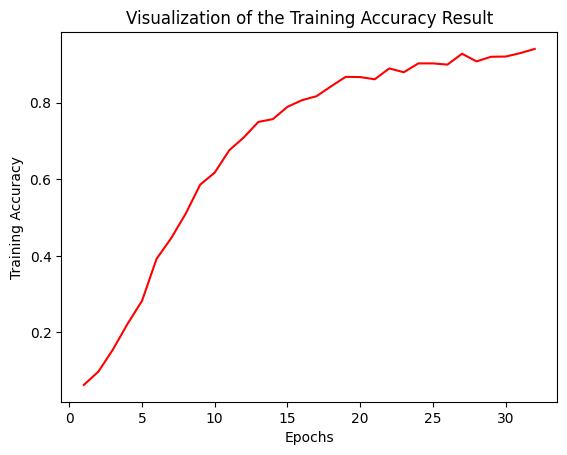

In [ ]:
num_epochs = len(training_history.history["accuracy"])

epochs = [i for i in range(1, num_epochs + 1)]

plt.plot(epochs, training_history.history["accuracy"], color="red")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Visualization of the Training Accuracy Result")
plt.show()

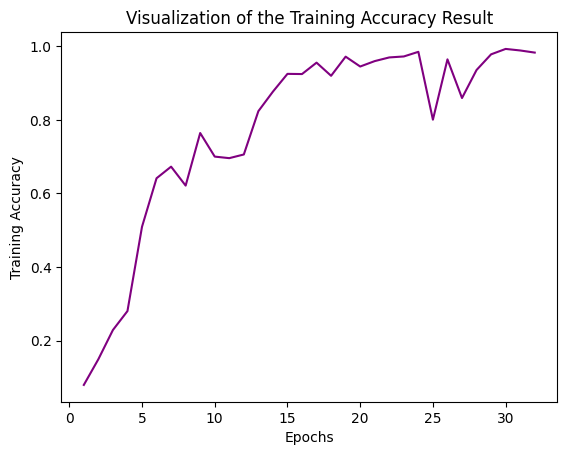

In [ ]:
plt.plot(epochs, training_history.history["val_accuracy"], color="purple")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Visualization of the Training Accuracy Result")
plt.show()

In [ ]:
cnn = tf.keras.models.load_model("/content/trained_model.h5")

In [ ]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 18.7 MB/s eta 0:00:00


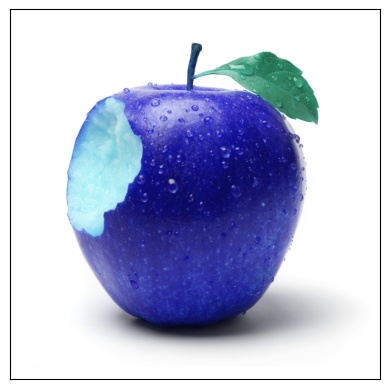

In [ ]:
import cv2
fruit_name = "apple"
image_path = f"/content/drive/MyDrive/images/archive/test/{fruit_name}/Image_1.jpg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [ ]:
print(predictions)

[[1.0000000e+00 2.4183357e-30 3.6352814e-17 1.9625171e-24 0.0000000e+00
  6.7378811e-11 2.4957916e-19 1.6389644e-37 1.7644290e-19 8.7499883e-37
  0.0000000e+00 0.0000000e+00 1.4163490e-32 4.8863710e-35 3.5837815e-34
  3.0790720e-26 4.7271216e-33 4.6479348e-37 1.2740347e-35 4.2103189e-37
  1.9835738e-19 3.3593756e-20 6.9323716e-32 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]


In [ ]:
result_index = np.where(predictions[0] == max(predictions[0]))

In [ ]:
print(result_index)

(array([0]),)


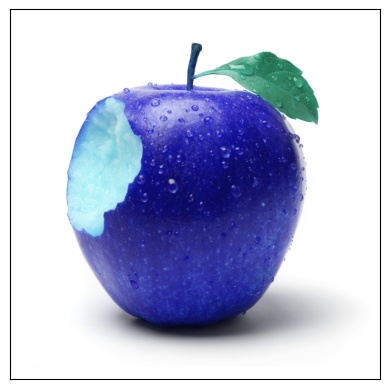

In [ ]:
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
print(test_set.class_names[result_index[0][0]])

apple


In [ ]:
def input_fruit(fruit):
  image_path = f"/content/drive/MyDrive/images/archive/test/{fruit}/Image_1.jpg"
  img = cv2.imread(image_path)
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()


  image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64,64))
  input_arr = tf.keras.preprocessing.image.img_to_array(image)
  input_arr = np.array([input_arr])
  predictions = cnn.predict(input_arr)

  result_index = np.where(predictions[0] == max(predictions[0]))

  return test_set.class_names[result_index[0][0]]

fruit name:Carrot


TypeError: Image data of dtype object cannot be converted to float

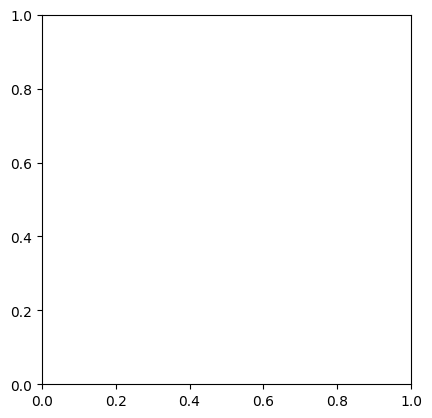

In [ ]:
name = input("fruit name:")
print(input_fruit(name))